<a href="https://colab.research.google.com/github/eugemoris/Procesamiento_de_imagenes/blob/main/TP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image,ImageFilter  
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#matrices que nos permiten pasarnos a los distintos espacios vectoriales
RGB2YIQ= np.array([[0.299, 0.587, 0.114],
                [0.59590059, -0.27455667, -0.32134392],
                [0.21153661, -0.52273617, 0.31119955]])

YIQ2RGB= np.array([[1, 0.9663, 0.6210],
                [1, -0.2721, -0.6474],
                [1, -1.1070, 1.7046]])

In [3]:
def read_img(path):
    '''obtengo imagen desde una ruta dada'''
    img = Image.open(path) 
    return img

def save_img(path,img):
    ''' guardo al imagen en una ruta dada'''
    img = img.save(path)

def img2arr(img):
    ''' paso la imagen a matriz'''
    img_arr = np.asarray(img)
    return img_arr

def arr2img(img_arr):
    '''transformo la matriz en un objeto imagen'''
    img = Image.fromarray(np.uint8(img_arr))
    return img

def norm_Img(arrimg):
    ''' normalizo los datos de una array'''
    arr_norm = arrimg/255.0
    return arr_norm

def rgb2yml(arr_img):
    result = np.dot(arr_img, RGB2YIQ.transpose())
   
    return result

def yiq2rgb(arr_img):
    OrigShape=arr_img.shape
    result = np.dot(arr_img.reshape(-1,3), YIQ2RGB.transpose()).reshape(OrigShape)
    return result


def change_y(arr_img, alfa):
    arr_img[:,:,0] = arr_img[:,:,0] * alfa  
    return arr_img

def change_i(arr_img, beta):
    arr_img[:,:,1] = arr_img[:,:,1] * beta  
    return arr_img

def change_q(arr_img, beta):
    arr_img[:,:,2] = arr_img[:,:,2] * beta  
    return arr_img

def clipear(matyiq):
  np.clip(matyiq, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))

In [4]:
def get_yiq(img):

  img_norm = norm_Img(img)
  img_norm = np.clip(img_norm, a_min=np.array([0,0,0]), a_max=np.array([1,1,1]))

  img_yiq = rgb2yml(img_norm)

  return img_yiq

#Histograma

In [5]:
from skimage import data
import seaborn as sns
coffee = data.coffee()

coffee_yiq=get_yiq(coffee)



      

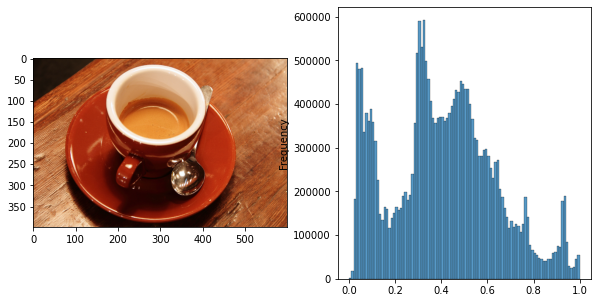

In [11]:
#@title Choose aritmetic options. { run: "auto" }

def plot(bins):
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  plt.imshow(coffee)

  plt.subplot(122)
  sns.histplot(data= coffee_yiq[:,:,0].flatten(),
               stat='frequency',  bins=bins,cbar=False)

  plt.show()

bins = "100" #@param [5,10,20,50,100]
plot(int(bins))

# Problemas de iluminación 

Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado. 

In [76]:
def change_light(img,alfa):
  img_yiq = get_yiq(img)
  new_img= change_y(img_yiq,alfa)
  return new_img

def lighting(img):
  img_yiq = get_yiq(img)
  img_yiq[:,:,0] = np.sqrt(img_yiq[:,:,0])
  img_yiq = np.clip(img_yiq, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))
  return img_yiq

def darker(img):
  img_yiq = get_yiq(img)
  img_yiq[:,:,0] = np.power(img_yiq[:,:,0],2)
  img_yiq = np.clip(img_yiq, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))
  return img_yiq


  

#Linear a trozos

Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen. 

In [140]:
import copy

def lenear(img,min, max):

  
  result = img.copy()
  row,col,dim = result.shape
  print('row: ', row, ' col: ',col)

  result = np.clip(result, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))
  
  y_arr = result[:,:,0]
  for i in range(row):
    for j in range(col):
      if y_arr[i,j] > max:
        y_arr[i,j]=1
      if y_arr[i,j] < min:
        y_arr[i,j]=0
      if y_arr[i,j] > min and y_arr[i,j] < max:
        y_arr[i,j] = (y_arr[i,j]-min)/(max) 
  result[:,:,0]=y_arr

  result = np.clip(result, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))

  short_img = yiq2rgb(result)
  short_img = np.clip(short_img, a_min=np.array([0,0,0]), a_max=np.array([1,1,1]))
  short_img =  np.uint32(short_img * 255)
  short_img = np.clip(short_img, a_min=np.array([0,0,0]), a_max=np.array([255,255,255]))
  
  return short_img




In [141]:
def correct_img(img, alfa, method):
  if method == 'alfa':
    img = change_light(img,alfa)
  if method == 'sqrt':
    img = lighting(img)
  if method == 'sqr':
    img = darker(img)
  img = yiq2rgb(img)
  img =  np.uint16(img * 255)
  img = np.clip(img, a_min=np.array([0,0,0]), a_max=np.array([255,255,255]))
  return img

In [138]:
def plot(alfa,y_min, y_max,img,method):  
  
  yiq = get_yiq(img)
  img = lenear(yiq.copy(),y_min,y_max)
  new_img = correct_img(img,alfa,method)
  
  plt.figure(figsize=(40,5))
  plt.subplot(141)
  plt.imshow(img)

  plt.subplot(142)
  sns.histplot(data= img.flatten(),
                stat='frequency',  bins=10,cbar=False)
  
  plt.subplot(143)
  plt.imshow(new_img)

  plt.subplot(144)
  sns.histplot(data= new_img.flatten(),
                stat='frequency',  bins=10,cbar=False)

  plt.show()

row:  671  col:  1024


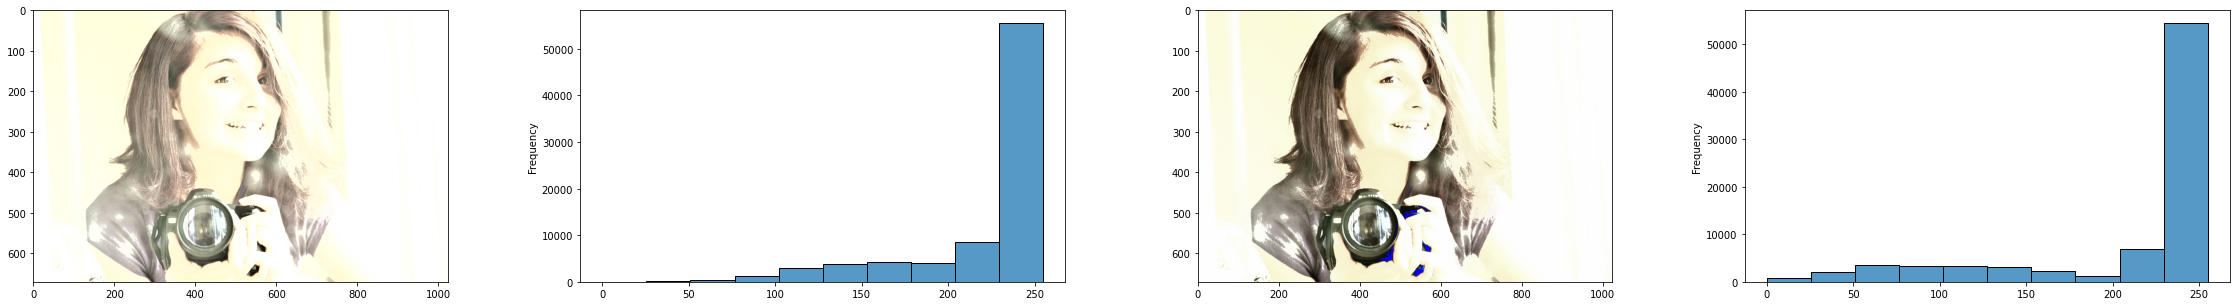

In [148]:
#@title Change Y in img {run:"auto"}

y_min = 0.1 #@param {type:"slider", min:0, max:1, step:0.1}
y_max = 0.7 #@param {type:"slider", min:0, max:1, step:0.1}

alfa = 1 #@param {type:"slider", min:0, max:1, step:0.1}
img_choose = 'light' #@param ["dark", "light"]
if img_choose == 'dark':
  dark = read_img('/content/dark.jpg')
  arr = img2arr(dark)
if img_choose == 'light':
  light = read_img('/content/light.jpg')
  arr = img2arr(light)

method_correction = 'sqr' #@param ["alfa","sqrt","sqr"]

plot(alfa,y_min,y_max,arr,method_correction)